In [1]:
%matplotlib widget

# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 

In [2]:
import matplotlib.pyplot as plt

import ipywidgets as ipw
from widget_periodictable import PTableWidget

plt.ioff()

In [3]:
from aiidalab_sssp.widgets import SSSP_DB

# Show the widget
periodic_table_widget = PTableWidget(states = 1,
                      selected_colors = ['royalblue'], 
                      unselected_color='cornflowerblue', border_color = 'black', width = '40px')

disable_elements = [e for e in periodic_table_widget.allElements if e not in SSSP_DB.keys()]
periodic_table_widget.disabled_elements = disable_elements

last_selected = periodic_table_widget.selected_elements
def on_element_select(event):
    global last_selected

    if event['name'] == 'selected_elements' and event['type'] == 'change':
        if tuple(event['new'].keys()) == ('Du', ):
            last_selected = event['old']
        elif tuple(event['old'].keys()) == ('Du', ):
            #print(last_selected, event['new'])
            if len(event['new']) != 1:
                # Reset to only one element only if there is more than one selected,
                # to avoid infinite loops
                newly_selected = set(event['new']).difference(last_selected)
                # If this is empty it's ok, unselect all
                # If there is more than one, that's weird... to avoid problems, anyway, I pick one of the two
                if newly_selected:
                    periodic_table_widget.selected_elements = {list(newly_selected)[0]: 0}
                else:
                    periodic_table_widget.selected_elements = {}
                # To have the correct 'last' value for next calls
                last_selected = periodic_table_widget.selected_elements

periodic_table_widget.observe(on_element_select)

display(periodic_table_widget)

PTableWidget(allElements=['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', '…

In [4]:
from aiidalab_sssp.widgets import PseudoSelectWidget

pseudo_select_widget = PseudoSelectWidget()

# pseudo_select_widget.selected_element = 'Au'
ipw.dlink(
    (periodic_table_widget, 'selected_elements'), 
    (pseudo_select_widget, 'selected_element'),
    transform=lambda elements: list(elements.keys())[0] if elements else None,
)

In [5]:
display(pseudo_select_widget)

PseudoSelectWidget(children=(HTML(value='No element is selected'), SelectMultiple(layout=Layout(width='98%'), …

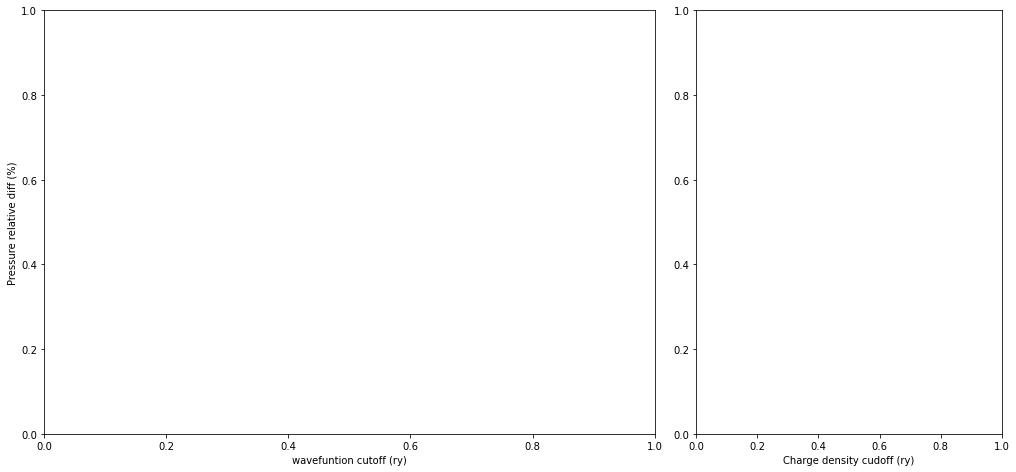

In [6]:
from aiidalab_sssp import widgets_plot as wplot


plot_delta_measure_widget = wplot.PlotDeltaMeasureWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_delta_measure_widget, 'selected_pseudos'))

plot_cohesive_energy_converge_widget = wplot.PlotCohesiveEnergyConvergeWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_cohesive_energy_converge_widget, 'selected_pseudos'))

plot_cohesive_energy_converge_diff_widget = wplot.PlotCohesiveEnergyConvergeDiffWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_cohesive_energy_converge_diff_widget, 'selected_pseudos'))

plot_phonon_frequencies_converge_abs_widget = wplot.PlotPhononFrequenciesConvergeAbsWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_phonon_frequencies_converge_abs_widget, 'selected_pseudos'))

plot_phonon_frequencies_converge_rel_widget = wplot.PlotPhononFrequenciesConvergeRelWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_phonon_frequencies_converge_rel_widget, 'selected_pseudos'))

plot_pressure_converge_widget = wplot.PlotPressureConvergeWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_pressure_converge_widget, 'selected_pseudos'))

plot_pressure_converge_rel_widget = wplot.PlotPressureConvergeRelWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (plot_pressure_converge_rel_widget, 'selected_pseudos'))

## $\Delta$ measures (normol $\Delta$-factor, $\Delta'$-factor and 'length of the vector' measure)

### $\Delta$-factor
The $\Delta$-factor is defined from the result of Birch-Murnanghan fitting which is:

$$
    E_\text{BM}(V) = E_0 + \frac{9 V_0 B_0}{16} {[(V_0 / V)^{2/3}-1]^3 B_0^{'} + [(V_0 / V)^{2/3}-1]^2[6-4(V_0 / V)^{2/3}]}
$$

Where the energies are calculated from changing lattice parameters at different volumes diviate from the balance position. The the $\Delta$-factor is integrated difference of two Birch-Murnanghan fitting result:

$$
    \Delta = \sqrt{\frac{\int \mathrm{d} V \Delta E_{\text{BM}}^2(V)}{\Delta{V}}}    
$$

### $\Delta'$-factor
However $\Delta$ is stiffness-dependent quantity, being proportional to $B_0$. The $\Delta'$ is introduced to renormalized $\Delta$-factor which is similar to the original $\Delta$-factor except it is "renormalized"
to reference values of $V^{\text{ref}}$ and $B^{\text{ref}}$ for all the elements

$$
\Delta' = \frac{V_{\text{ref}}B_{\text{ref}}}{V_{\text{AE}}B_{\text{AE}}} \Delta
$$

- $V^{\text{ref}}=30 \text{Bohr}$
- $B^{\text{ref}}=100\text{GPa}$ 

are correspond approximatively to the mean values of $V_0$ and $B_0$ over the 71 unitary elements tested.

### length of the vector measure
We also defined the measure 'length of the vector' formed by the relative error of $V_0$, $B_0$, $B_1$

In this page I choose prefactor ($B_0=\frac{1}{8}$) and ($B_1=\frac{1}{64}$).

In order to compare the result with $\Delta$ and $\Delta'$, I multiply the result with prefactor $\times 400$ so they are in the same order.

In [7]:
display(plot_delta_measure_widget)

PlotDeltaMeasureWidget(children=(Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figu…

## Summary of convergence verification 

The convergence criteria we use here is:
- Cohesive energy: $E^{abs}_{coh} < 2.0 (\text{meV/atom})$
- Phonon frequencies: $\delta \bar{\omega} < 1.0 (\%)$
- Pressure: $\delta P < 0.5 (\%)$

In [ ]:
from aiidalab_sssp.widgets import SummaryWidget

summary_widget = SummaryWidget()
ipw.dlink((pseudo_select_widget, 'selected_pseudos'), (summary_widget, 'selected_pseudos'))
display(summary_widget)

#### ⚠️ Notes:
For wavefunction cutoff convergence verification, the charge density cutoff is fixed at $x_c^{rho}=200\times d$, where $d=4$ for norm-converserving pseudopotentials and $d=8$ for ultra-soft and paw pseudopotentials. 

For charge density cutoff convergence verification, the wavefunction cutoff is fixed at converged value of wavefunction cutoff convergence test.

The reference cutoff $(x_c^{wfc}, x_c^{rho})$ is set to $(200, 200\times d)$ for both wavefunctian and charge density verifications.


## Cohesive energy (eV/atom)

The cohesive energy $E_{\text{coh}}$ is the energy gained by arranging the atoms in a crystalline state.

$$
    E_{\text{coh}} = E_{\text{bulk}} - E_{\text{atom}}
$$

The different of cohesive energy with respect to reference is defined as:

$$
    \delta E_{\text{coh}} = E_{\text{coh}}(x_c) - E_{\text{coh}}(x_{ref})
$$

- $x_c$: the cutoff setting of sample point
- $x_{ref}$: the cutoff setting of the reference point (the converged value), 

In [ ]:
display(plot_cohesive_energy_converge_widget)

## Cohesive energy error (eV/atom)

The error of cohesive energy w.r.t converged reference cutoff (200 Ry for wavefunction cutoff) is defined as:

$$
    \delta E_{\text{coh}} = E_{\text{coh}}(x_c) - E_{\text{coh}}(x_{ref})
$$

- $x_c$: the cutoff setting of sample point
- $x_{ref}$: the cutoff setting of the reference point (the converged value), 

In [8]:
display(plot_cohesive_energy_converge_diff_widget)

PlotCohesiveEnergyConvergeWidget(children=(Output(outputs=({'output_type': 'display_data', 'data': {'text/plai…

## Phonon frequencies absolute error ($cm^{-1}$)

The absolute error of phonon frequencies w.r.t reference cutoff (200 Ry for wavefunction cutoff) is defined as:

$$
    \delta \bar{\omega} = 
    \sqrt{\frac{1}{N} \sum^N_{i=1} \omega_i(x_c)-\omega_i(x_{ref})}
$$

- $\omega_i$: the frequencies of every modes. 
- N: the number of modes

In [9]:
display(plot_phonon_frequencies_converge_abs_widget)

PlotPhononFrequenciesConvergeWidget(children=(Output(outputs=({'output_type': 'display_data', 'data': {'text/p…

## Phonon frequencies relative error (%)

The relative error of phonon frequencies w.r.t reference cutoff (200 Ry for wavefunction cutoff) is defined as:

$$
    \delta \bar{\omega} = 
    \sqrt{\frac{1}{N} \sum^N_{i=1} \left | \frac{\omega_i(x_c)-\omega_i(x_{ref})}{\omega_i(x_{ref})} 
    \right|^2}
$$

- $\omega_i$: the frequencies of every modes. 
- N: the number of modes

In [ ]:
display(plot_phonon_frequencies_converge_rel_widget)

## Pressure absolute error (GPa)

The absolute error of pressure are complex defined w.r.t converged reference cutoff (200 Ry for wavefunction cutoff) is defined as:

$$
    \delta P = P(x_c) - P(x_{ref})
$$

In [10]:
display(plot_pressure_converge_widget)

PlotPressureConvergeWidget(children=(Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<…

## Pressure relative error (GPa)

The relative error of pressure are complex defined in terms of volume difference where the volume is converted from the pressure difference of the cutoff setting and converged reference setting:

$$
    \delta V = \frac{V'-V_0}{V_0}
$$

- $V'$ is the deviation volume as the one closest to the equilibrium volume 
- $V_0$ is read from the converged reference (wave function cutoff 200Ry) Birch-Murnaghan fitting. 

$$P_\text{BM}(V')=\delta P$$ 

In [ ]:
display(plot_pressure_converge_rel_widget)

<!-- Search and filter the results of verifications through Materials Cloud SSSP API.

User can also choose the protocol(critisize) to determine what kind of result they want to see, such as the precise one or the efficient one.

download the https://www.materialscloud.org/mcloud/api/v2/discover/sssp/elements/Si

The new API: https://app.swaggerhub.com/apis/unkcpz/mc-sssp/1.0.0 -->